se ha de notar que no estamos extrayendo el 1/k! que lleva cada hipergeometrica, asi que se pasara a otra estrategia

In [1]:
import braketsolver as bt
from sympy import *
from sympy.abc import k, m, n
__MAX__ = symbols('__MAX__')
x = symbols('x')
__MAX__ = 4
init_printing()

In [3]:
hyper?

Init signature: hyper(ap, bq, z)
Docstring:     
The generalized hypergeometric function is defined by a series where
the ratios of successive terms are a rational function of the summation
index. When convergent, it is continued analytically to the largest
possible domain.

Explanation

The hypergeometric function depends on two vectors of parameters, called
the numerator parameters $a_p$, and the denominator parameters
$b_q$. It also has an argument $z$. The series definition is

.. math ::
    {}_pF_q\left(\begin{matrix} a_1, \cdots, a_p \\ b_1, \cdots, b_q \end{matrix}
                 \middle| z \right)
    = \sum_{n=0}^\infty \frac{(a_1)_n \cdots (a_p)_n}{(b_1)_n \cdots (b_q)_n}
                        \frac{z^n}{n!},

where $(a)_n = (a)(a+1)\cdots(a+n-1)$ denotes the rising factorial.

If one of the $b_q$ is a non-positive integer then the series is
undefined unless one of the $a_p$ is a larger (i.e., smaller in
magnitude) non-positive integer. If none of the $b_q$ is a
non-posi

In [5]:
# define a hypergeometric function
f = hyper([1],[0], x)

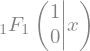

In [6]:
f

In [18]:
x = Symbol('x')
exp_hyper = hyper([],[], x)

# substitute x with 0.5
f_0_5 = exp_hyper.subs(x, 0.5)

# evaluate the hypergeometric function at x=0.5
f_eval = f_0_5.evalf()

print(f_eval)

print("y la raiz del numero e:", exp(0.5))

1.64872127070013
y la raiz del numero e: 1.64872127070013


$$
{}_1F_0 [a; | x] = \frac{1}{(1-x)^a}
$$

In [24]:
a = 2
rational_hyper = hyper([a],[], x)

# substitute x with 0.5
f_0_5 = rational_hyper.subs(x, 0.5)

# evaluate the hypergeometric function at x=0.5
f_eval = f_0_5.evalf()

print(f_eval)

4.00000000000000


# Extracting Parameters

In [25]:
f = rational_hyper

In [26]:
# extract hypergeometric parameters
ExtractHypergeometricParameters = lambda func: [g for g in func.atoms(Function) if g.func.__name__ in ["gamma", "RisingFactorial"]]
params = ExtractHypergeometricParameters(f)
print("Hypergeometric parameters: ", params)

Hypergeometric parameters:  []


In [32]:
from sympy import hyper, S

def ExtractHypergeometricParameters(f):
    a = f.ap
    b = f.bq
    # Convert all S.Zero to empty list
    a = [i if i != S.Zero else [] for i in a]
    b = [i if i != S.Zero else [] for i in b]
    return [a, b]

a = 2
rational_hyper = hyper([a],[], x)

# substitute x with 0.5
f_0_5 = rational_hyper.subs(x, 0.5)

# evaluate the hypergeometric function at x=0.5
f_eval = f_0_5.evalf()

print(f_eval)

# lets write a code thats capable of extracting this parameters
f = rational_hyper
params = ExtractHypergeometricParameters(f)
print("Hypergeometric parameters: ", params)
# the output should be
# Hypergeometric parameters:  [[2], []]

4.00000000000000
Hypergeometric parameters:  [[2], []]


In [29]:
f.ap

In [30]:
f.bq

In [ ]:
# ahora que sea capaz de extrar los parametros de una funcion hipergeometrica y las funciones gamma que esten multiplicando
# a la funcion hipergeometrica
def ExtractHypergeometricParameters(f):
    a = f.ap
    b = f.bq
    # extraer como lista los parametros que representan los RisingFactorial
    a = [i if i != S.Zero else [] for i in a]
    b = [i if i != S.Zero else [] for i in b]

    # ahora extraer las funciones gamma que estan multiplicando a la funcion hipergeometrica
    


    return [a, b]


In [36]:
rf

RisingFactorial

In [38]:
n = Symbol('n', integer=True, positive=True)
rf(2, n) # RisingFactorial or rising factorial as known in sympy

# Extracting Pre Factors

In [33]:
def remove(f, *args):
    return f.subs([(arg, 0) for arg in args])

In [34]:
# extract pre-factor
ExtractPreFactor = lambda func: simplify(expand(remove(*params, func)) * Mul(*params))
prefactor = ExtractPreFactor(f)
print("Pre-factor: ", prefactor)

AttributeError: 'list' object has no attribute 'subs'

In [22]:
#2do intento de prefactors
k_list = [symbols('k{}'.format(i)) for i in range(1, int(__MAX__)+1)]

ExtractPreFactor = lambda func: simplify(expand(func / Mul(*params))) * Mul(*[1/(n + k - m) for k, n, m in zip(k_list[:len(params)], params, range(1, len(params)+1))])
prefactor = ExtractPreFactor(f)
print("Pre-factor: ", prefactor)

Pre-factor:  hyper((1, 2), (3, 4, 5), x)


In [12]:
# extract hypergeometric arguments
ExtractHypergeometricArguments = lambda func: [g for g in func.args if any([k(i) in g.atoms() for i in range(1, __MAX__+1)])]
arguments = ExtractHypergeometricArguments(f)
print("Hypergeometric arguments: ", arguments)

TypeError: 'Add' object cannot be interpreted as an integer

In [39]:
import sympy as sp

def ExtractHypergeometricParameters(f):
    params = []
    for arg in f.args:
        if isinstance(arg, sp.Pow):
            if arg.base == sp.gamma:
                params.append(arg.args[0])
        elif isinstance(arg, sp.Piecewise):
            for expr, cond in arg.args:
                if isinstance(expr, sp.Mul):
                    for sub_expr in expr.args:
                        if isinstance(sub_expr, sp.Pow) and sub_expr.base == sp.RisingFactorial:
                            params.append(sub_expr.args[0])
                elif isinstance(expr, sp.Pow) and expr.base == sp.RisingFactorial:
                    params.append(expr.args[0])
        elif isinstance(arg, sp.Mul):
            for sub_expr in arg.args:
                if isinstance(sub_expr, sp.Pow) and sub_expr.base == sp.RisingFactorial:
                    params.append(sub_expr.args[0])
    return params


In [40]:
a = 2
rational_hyper = sp.hyper([a], [], x)
params = ExtractHypergeometricParameters(rational_hyper)
print("Hypergeometric parameters: ", params)


Hypergeometric parameters:  []


In [42]:
sp.RisingFactorial

AttributeError: module 'sympy' has no attribute 'pochhammer'

In [43]:
sp.RisingFactorial

RisingFactorial

In [55]:
import sympy as sp

def ExtractHypergeometricParameters(f):
    params = []
    for arg in f.args:
        if isinstance(arg, sp.RisingFactorial):
            params.append(arg.args)
    return params


In [56]:
a = 2
rational_hyper = sp.hyper([a], [], x)
params = ExtractHypergeometricParameters(rational_hyper)
print("Hypergeometric parameters: ", params)

Hypergeometric parameters:  []


In [58]:
for arg in f.args:
    print(arg)

(2,)
()
x


In [63]:
k_list = [symbols('k{}'.format(i)) for i in range(1, int(__MAX__)+1)]
k_list

In [65]:
# every hypergeometric function has its own k in k_list
# so we need to extract the k that corresponds to the hypergeometric function

# if first hypergeometric function then k_list[0]

for i in f.args[0]:
    print( sp.RisingFactorial(i, k_list[0]) )

for i in f.args[1]:
    print( sp.RisingFactorial(i, k_list[0]) )

RisingFactorial(2, k1)


In [67]:
sp.RisingFactorial(*rational_hyper.args[:2])


### intento de 
When we grab a function, we first need to find all the hypergeometric functions it contains, then all the RisingFactorials and then all the GammaFunctions

This is the very first step,
every time we find a hypergeometric function, we choose a symbol from the k_list
and we extract from that function using

In [68]:
import sympy as sp

def extract_hypergeometric_parameters(f, k_list=[]):
    # Initialize lists to hold the hypergeometric parameters, rising factorials, and gamma functions
    hyper_params = []
    rising_factorials = []
    gamma_funcs = []
    
    # Check if the current function is a hypergeometric function
    if isinstance(f, sp.functions.special.hyper.hyper):
        # Choose a symbol from the k_list for this hypergeometric function
        k = k_list[0] if len(k_list) > 0 else sp.Symbol('k')
        k_list = k_list[1:] if len(k_list) > 0 else k_list
        
        # Extract the hypergeometric parameters
        for arg in f.args:
            if isinstance(arg, (sp.Symbol, sp.Integer)):
                hyper_params.append([arg])
            elif isinstance(arg, sp.Tuple):
                hyper_params.append(list(arg))
        
        # Extract the rising factorials
        for i in f.args[0]:
            rising_factorials.append(sp.RisingFactorial(i, k))
        for i in f.args[1]:
            rising_factorials.append(sp.RisingFactorial(i, k))
        
        # Extract the gamma functions
        for arg in f.args:
            if isinstance(arg, sp.Pow) and arg.base == sp.EulerGamma:
                gamma_funcs.append(sp.gamma(arg.exp))
    
    # Recursively extract hypergeometric parameters, rising factorials, and gamma functions from the arguments of the function
    for arg in f.args:
        if isinstance(arg, sp.Basic):
            params, rf, gamma = extract_hypergeometric_parameters(arg, k_list)
            hyper_params += params
            rising_factorials += rf
            gamma_funcs += gamma
    
    return hyper_params, rising_factorials, gamma_funcs


In [71]:
# Define a hypergeometric function
a = 2
rational_hyper = sp.hyper([a],[1], x)

# Extract hypergeometric parameters, rising factorials, and gamma functions
params, rf, gamma = extract_hypergeometric_parameters(rational_hyper)

# Print the results
print("Hypergeometric parameters:", params)
print("Rising factorials:", rf)
print("Gamma functions:", gamma)


Hypergeometric parameters: [[2], [1], [x]]
Rising factorials: [RisingFactorial(2, k), factorial(k)]
Gamma functions: []


una excelente modificacion, pero ahora queremos ser capaces de extraer las cosas que estan multiplcando tambien

In [74]:
def extract_hypergeometric_parameters(f, k_list=[]):
    # Initialize lists to hold the hypergeometric parameters, rising factorials, and gamma functions
    hyper_params = []
    rising_factorials = []
    gamma_funcs = []
    
    # Check if the current function is a hypergeometric function
    if isinstance(f, sp.functions.special.hyper.hyper):
        # Choose a symbol from the k_list for this hypergeometric function
        k = k_list[0] if len(k_list) > 0 else sp.Symbol('k')
        k_list = k_list[1:] if len(k_list) > 0 else k_list
        
        # Extract the hypergeometric parameters
        for arg in f.args:
            if isinstance(arg, (sp.Symbol, sp.Integer)):
                hyper_params.append([arg])
            elif isinstance(arg, sp.Tuple):
                hyper_params.append(list(arg))
        
        # Extract the rising factorials
        for i in f.args[0]:
            rising_factorials.append(sp.RisingFactorial(i, k))
        for i in f.args[1]:
            rising_factorials.append(sp.RisingFactorial(i, k))
        
        # Extract the gamma functions
        for arg in f.args:
            if isinstance(arg, sp.Pow) and arg.base == sp.EulerGamma:
                gamma_funcs.append(sp.gamma(arg.exp))
    
    # Check if the current function is a gamma function with a summand
    elif isinstance(f, sp.Mul):
        for arg in f.args:
            if isinstance(arg, sp.Pow) and arg.base == sp.gamma:
                if arg.exp.is_Add:
                    for a in arg.exp.args:
                        gamma_funcs.append(sp.gamma(a))
                elif arg.exp.is_Mul:
                    gamma_funcs.append(sp.gamma(arg.exp))
            elif isinstance(arg, sp.Pow) and arg.base == sp.Pochhammer:
                if arg.exp.is_Add:
                    for a in arg.exp.args:
                        rising_factorials.append(sp.RisingFactorial(arg.base.args[0], a))
                elif arg.exp.is_Mul:
                    rising_factorials.append(sp.RisingFactorial(arg.base.args[0], arg.exp))
    
    # Recursively extract hypergeometric parameters, rising factorials, and gamma functions from the arguments of the function
    for arg in f.args:
        if isinstance(arg, sp.Basic):
            params, rf, gamma = extract_hypergeometric_parameters(arg, k_list)
            hyper_params += params
            rising_factorials += rf
            gamma_funcs += gamma
    
    return hyper_params, rising_factorials, gamma_funcs



In [75]:
a = 2
rational_hyper = sp.hyper([a],[1], x) * sp.gamma(x)

# Extract hypergeometric parameters, rising factorials, and gamma functions
params, rf, gamma = extract_hypergeometric_parameters(rational_hyper)

# Print the results
print("Hypergeometric parameters:", params)
print("Rising factorials:", rf)
print("Gamma functions:", gamma)


# no entrega las gammas correctamente


Hypergeometric parameters: [[2], [1], [x]]
Rising factorials: [RisingFactorial(2, k), factorial(k)]
Gamma functions: []


### dado otro intento

In [76]:
def extract_hypergeometric_parameters(f, k_list=[]):
    # Initialize lists to hold the hypergeometric parameters, rising factorials, and gamma functions
    hyper_params = []
    rising_factorials = []
    gamma_funcs = []
    
    # Check if the current function is a hypergeometric function
    if isinstance(f, sp.functions.special.hyper.hyper):
        # Choose a symbol from the k_list for this hypergeometric function
        k = k_list[0] if len(k_list) > 0 else sp.Symbol('k')
        k_list = k_list[1:] if len(k_list) > 0 else k_list
        
        # Extract the hypergeometric parameters
        for arg in f.args:
            if isinstance(arg, (sp.Symbol, sp.Integer)):
                hyper_params.append([arg])
            elif isinstance(arg, sp.Tuple):
                hyper_params.append(list(arg))
        
        # Extract the rising factorials
        for i in f.args[0]:
            rising_factorials.append(sp.RisingFactorial(i, k))
        for i in f.args[1]:
            rising_factorials.append(sp.RisingFactorial(i, k))
        
        # Extract the gamma functions
        for arg in f.args:
            if isinstance(arg, sp.Pow) and arg.base == sp.EulerGamma:
                gamma_funcs.append(sp.gamma(arg.exp))
            elif isinstance(arg, sp.Pow):
                base, exp = arg.as_base_exp()
                if base == k and isinstance(exp, sp.Symbol):
                    gamma_funcs.append(sp.gamma(exp))
    
    # Recursively extract hypergeometric parameters, rising factorials, and gamma functions from the arguments of the function
    for arg in f.args:
        if isinstance(arg, sp.Basic):
            params, rf, gamma = extract_hypergeometric_parameters(arg, k_list)
            hyper_params += params
            rising_factorials += rf
            gamma_funcs += gamma
    
    return hyper_params, rising_factorials, gamma_funcs


In [77]:
a = 2
rational_hyper = sp.hyper([a],[1], x) * sp.gamma(x)

# Extract hypergeometric parameters, rising factorials, and gamma functions
params, rf, gamma = extract_hypergeometric_parameters(rational_hyper)

# Print the results
print("Hypergeometric parameters:", params)
print("Rising factorials:", rf)
print("Gamma functions:", gamma)


# no entrega las gammas correctamente


Hypergeometric parameters: [[2], [1], [x]]
Rising factorials: [RisingFactorial(2, k), factorial(k)]
Gamma functions: []


### 3er intento

In [78]:
def extract_hypergeometric_parameters(f, k_list=[]):
    # Initialize lists to hold the hypergeometric parameters, rising factorials, and gamma functions
    hyper_params = []
    rising_factorials = []
    gamma_funcs = []

    # Check if the current function is a hypergeometric function
    if isinstance(f, sp.functions.special.hyper.hyper):
        # Choose a symbol from the k_list for this hypergeometric function
        k = k_list[0] if len(k_list) > 0 else sp.Symbol('k')
        k_list = k_list[1:] if len(k_list) > 0 else k_list

        # Extract the hypergeometric parameters
        for arg in f.args:
            if isinstance(arg, (sp.Symbol, sp.Integer)):
                hyper_params.append([arg])
            elif isinstance(arg, sp.Tuple):
                hyper_params.append(list(arg))

        # Extract the rising factorials
        for i in f.args[0]:
            rising_factorials.append(sp.RisingFactorial(i, k))
        for i in f.args[1]:
            rising_factorials.append(sp.RisingFactorial(i, k))

        # Extract the gamma functions
        for arg in f.args:
            if isinstance(arg, sp.Pow) and arg.base == sp.EulerGamma:
                gamma_funcs.append(sp.gamma(arg.exp))
            elif isinstance(arg, sp.Mul):
                gamma_terms = [term for term in arg.args if isinstance(term, sp.Pow) and term.base == sp.EulerGamma]
                if len(gamma_terms) > 0:
                    gamma_product = sp.Mul(*[sp.gamma(term.exp) for term in gamma_terms])
                    gamma_funcs.append(gamma_product)

    # Recursively extract hypergeometric parameters, rising factorials, and gamma functions from the arguments of the function
    for arg in f.args:
        if isinstance(arg, sp.Basic):
            params, rf, gamma = extract_hypergeometric_parameters(arg, k_list)
            hyper_params += params
            rising_factorials += rf
            gamma_funcs += gamma

    return hyper_params, rising_factorials, gamma_funcs


In [82]:
a = 2
rational_hyper = sp.hyper([a],[1], x) * sp.gamma(x)
f = rational_hyper

# Extract hypergeometric parameters, rising factorials, and gamma functions
params, rf, gamma = extract_hypergeometric_parameters(f)

# Print the results
print("Hypergeometric parameters:", params)
print("Rising factorials:", rf)
print("Gamma functions:", gamma)


Hypergeometric parameters: [[2], [1], [x]]
Rising factorials: [RisingFactorial(2, k), factorial(k)]
Gamma functions: []


In [85]:
for arg in f.args:
    print(arg)
    print(isinstance(arg, sp.Basic))

    print(extract_hypergeometric_parameters(arg, []))

gamma(x)
True
([], [], [])
hyper((2,), (1,), x)
True
([[2], [1], [x]], [RisingFactorial(2, k), factorial(k)], [])


### exp 4
despues de explicar lo anterior, se procede a crear este codigo:

In [88]:
import sympy as sp

def extract_hypergeometric_parameters(expr, params):
    rf = []
    gamma = []
    for arg in expr.args:
        if isinstance(arg, sp.gamma):
            gamma.append(arg)
        elif isinstance(arg, sp.hyper):
            a, b, z = arg.args
            params.append(a)
            params.append(b)
            params.append(z)
            for i in range(len(a)):
                rf.append(sp.RisingFactorial(a[i], i))
            for i in range(len(b)):
                rf.append(sp.factorial(b[i]-1))
        elif arg.args:
            extract_hypergeometric_parameters(arg, params)
    return params, rf, gamma

a = 2
rational_hyper = sp.hyper([a], [1], x) * sp.gamma(x)

params, rf, gamma = extract_hypergeometric_parameters(rational_hyper, [])
print("Hypergeometric parameters:", params)
print("Rising factorials:", rf)
print("Gamma functions:", gamma)



Hypergeometric parameters: [(2,), (1,), x]
Rising factorials: [1, 1]
Gamma functions: [gamma(x)]


## exp 5

In [89]:
def extract_hypergeometric_parameters(f):
    hyper_params = []
    rising_factorials = []
    gamma_functions = []

    # Extract the arguments of the hypergeometric function
    hyper_args = f.args[0]

    # Extract the hypergeometric parameters
    for i in range(len(hyper_args)):
        if isinstance(hyper_args[i], tuple):
            hyper_params.append(list(hyper_args[i]))

    # Extract the rising factorials
    for i in f.args[0]:
        if isinstance(i, sp.core.function.RisingFactorial):
            rising_factorials.append(i)

    # Extract the gamma functions
    for arg in f.args:
        if isinstance(arg, sp.core.function.gamma):
            gamma_functions.append(arg)

    return hyper_params, rising_factorials, gamma_functions



In [90]:
a = 2
rational_hyper = sp.hyper([a],[1], x) * sp.gamma(x)

# Extract hypergeometric parameters, rising factorials, and gamma functions
params, rf, gamma = extract_hypergeometric_parameters(rational_hyper)

# Print the results
print("Hypergeometric parameters:", params)
print("Rising factorials:", rf)
print("Gamma functions:", gamma)


TypeError: object of type 'gamma' has no len()

## exp6 
explaining if functions to extract parameters

In [101]:
expr = sp.hyper([2], [1], x) * sp.gamma(x)

# we will work with 1 hypergeometric function at a time, so we can use a single k here, to avoid confussion

gamma = [] # gamma functions
params = [] # (a,), (b,), z
rf = [] # rising factorials

for arg in expr.args: # gets gamma and hyper
    print(arg)
    if isinstance(arg, sp.gamma): # checks gamma
        gamma.append(arg)
    elif isinstance(arg, sp.hyper):
        a, b, z = arg.args # get args from hyper
        params.append(a)
        params.append(b)
        params.append(z)
        # here we get the rising factorials
        for i in range(len(a)):
            rf.append(sp.RisingFactorial(a[i], k)) # right way to do it
        for i in range(len(b)):
            rf.append(sp.RisingFactorial(b[i], k)) # I did some changes
    
    #elif arg.args: # you wrote this, but I don't understand why you need it
    #   extract_hypergeometric_parameters(arg, params)

    

print("Hypergeometric parameters:", params)
print("Gamma functions:", gamma)
print("Rising factorials:", rf)


gamma(x)
hyper((2,), (1,), x)
Hypergeometric parameters: [(2,), (1,), x]
Gamma functions: [gamma(x)]
Rising factorials: [RisingFactorial(2, k), factorial(k)]


despues de explicar, la IA lo reescribio así:

In [102]:
import sympy as sp

# Define a rational hypergeometric expression
rational_hyper = sp.hyper([2], [1], x) * sp.gamma(x)

# Define a function to extract the hypergeometric parameters
def extract_hypergeometric_parameters(f):
    hyper_params = []
    rising_factorials = []
    gamma_functions = []

    for arg in f.args:
        if isinstance(arg, sp.gamma):
            gamma_functions.append(arg)
        elif isinstance(arg, sp.hyper):
            hyper_args = arg.args
            a = hyper_args[0]
            b = hyper_args[1]
            z = hyper_args[2]
            hyper_params.append(a)
            hyper_params.append(b)
            hyper_params.append(z)
            for i in range(len(a)):
                rising_factorials.append(sp.RisingFactorial(a[i], k))
            for i in range(len(b)):
                rising_factorials.append(sp.RisingFactorial(b[i], k))

    return hyper_params, rising_factorials, gamma_functions

# Extract hypergeometric parameters, rising factorials, and gamma functions
params, rf, gamma = extract_hypergeometric_parameters(rational_hyper)

# Print the results
print("Hypergeometric parameters:", params)
print("Rising factorials:", rf)
print("Gamma functions:", gamma)


Hypergeometric parameters: [(2,), (1,), x]
Rising factorials: [RisingFactorial(2, k), factorial(k)]
Gamma functions: [gamma(x)]
